In [75]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from pylab import rcParams
rcParams['figure.figsize'] = 9, 6

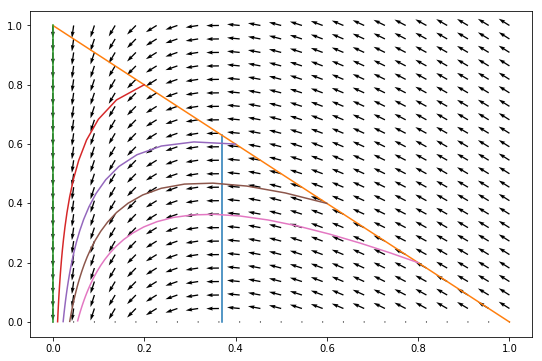

In [180]:
n = 23
I, S = np.meshgrid(np.linspace(0, 1, n),np.linspace(0, 1, n))
beta= 0.38
gamma = 0.14

newS = -beta * S * I
newI = beta * S * I - gamma * I


for i in range(n):
    for j in range(n):
        v = np.array([newS[i][j], newI[i][j]])
        normalized_v = v / (np.sqrt(np.sum(v**2)) + 1e-5)
        newS[i][j] = normalized_v[0]
        newI[i][j] = normalized_v[1]

best = 0
best_score = 1e9
for divide in range(n-1):
    left = 0
    right = 0
    summ = 0
    for i in range(n):
        summ += abs(newI[divide][i])
        summ += abs(newI[divide+1][i])
    if summ < best_score:
        best = divide
        best_score = summ

best = float(best) / n
best += 1 / (2*n)
plt.plot([best, best], [0, 1-best])
plt.plot([0,1],[1,0])


for x in np.linspace(0, 1, 6):
  xs = []
  ys = []
  y = 1 - x
  for i in range(50):
    xs.append(x)
    ys.append(y)
    x, y = x - beta * x * y, y + beta * x * y - gamma * y
  plt.plot(xs, ys)


plt.quiver(S, I, newS, newI)
plt.show()